# Text De-Toxification, part I: Data Exploration
### Robert Chen, B20-AI
--------------------

## Step 0: Imports

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Step 1: Exploring initial `ParaMNT-detox` corpus

Let us unpack and import the data first:

In [9]:
#!/usr/bin/bash
DATA_DIR="../data"
! sh $DATA_DIR/download_paranmt.sh

Now, we can safely parse the `.tsv` file via `pandas`

In [10]:
data = pd.read_csv('../data/raw/filtered.tsv', delimiter='\t', index_col=0)
data.head()

,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


Let us first check for missing values:

In [11]:
data.isna().sum()

reference      0
translation    0
similarity     0
lenght_diff    0
ref_tox        0
trn_tox        0
dtype: int64

Since there are no missing values in the dataset, we can omit the data imputing step. Let us look at the stats of non-string columns:

In [12]:
data.describe()

,similarity,lenght_diff,ref_tox,trn_tox
count,577777.000000,577777.000000,577777.000000,577777.000000
mean,0.758469,0.157652,0.541372,0.434490
std,0.092695,0.108057,0.457571,0.458904
min,0.600001,0.000000,0.000033,0.000033
25%,0.681105,0.066667,0.012171,0.000707
50%,0.754439,0.141791,0.806795,0.085133
75%,0.831244,0.238095,0.990469,0.973739
max,0.950000,0.400000,0.999724,0.999730


Looking at the maximum values of `ref_tox` (toxicity level of referenced text) and `trn_tox` (toxicity level of translated sentence), we can see that translated sentences sometimes present a more toxic translation than the referenced text already is. That is why we also need to account this during the training.as

<Axes: >

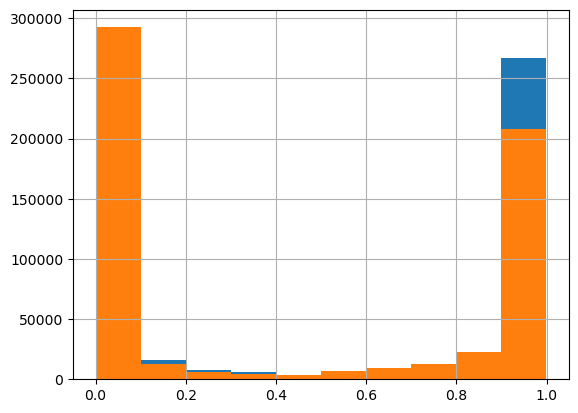

In [13]:
data.ref_tox.hist()
data.trn_tox.hist()

In [16]:
data[data.ref_tox >= 0.5].sort_values(by='ref_tox', ascending=True).head(10)

,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
213238,That the boss might’ve fucked someone else up ...,the fact that the boss might have hacked someo...,0.815064,0.048193,0.500185,0.000071
476035,Can you tell me what the hell is going on here?,can you tell me what's going on?,0.897083,0.312500,0.500365,0.000044
49824,"Oh, my God, that's disgusting.","my God, this is outrageous.",0.854341,0.096774,0.500470,0.000203
381882,Pig fat was not part of the bet.,the cast is not part of the bet.,0.607406,0.000000,0.500488,0.000061
481735,It's about bloody time!,it's about time!,0.776916,0.291667,0.500502,0.000056
85274,It's about bloody time!,it was about time!,0.727407,0.208333,0.500502,0.000054
30000,Shot him in the doorway.,and they got him right in the door.,0.624124,0.305556,0.500517,0.000083
221767,"Clothes, compliments and cocks.","clothes, compliments and birds.",0.791582,0.000000,0.500557,0.000066
406555,Thank you so fucking much.,thank you very much.,0.908010,0.222222,0.500597,0.000044
565656,"I heard that, you smart-ass!","I heard it, genius!",0.666494,0.310345,0.500614,0.000406
